# see19 Guide

**A dataset and interface for visualizing and analyzing the epidemiology of Coronavirus Disease 2019 aka SARS-CoV-2 aka COVID19 aka C19**

Find it on [GitHub](https://github.com/ryanskene/see19)

Current w version 0.3.0

# 6. Heat Map Visualizations

### Hexbins? ###
See19 utilizes the `hexbin` module of `matplotlib` to generate ***HeatMap***-style charts to investigate the impact of different factors on COVID19 virulence.

This is a bit of a repurpose or basterdization from `hexbin`'s intended usage. `hexbin` is more commonly used as a 2D histogram for very large datasets, counting the appearance of datapoints at within a range certain `(x,y)` coordinates (called `bins`) and then mapping a color scheme to the range of counts.

For our purposes, use of `hexbin` is a stylistic choice, with the patterns developed more interesting and a bit more revealing than a scatter plot. The intention is for each `bin` to contain only one datapoint and the color is mapped to either the x-axis values or a 3rd dimension of values. 

### Structure ###

As with previous charts, heatmaps are available in `CaseStudy` via the `heatmap` attribute, which is in turn an instance of the `HeatMap` class.

Charts are generated via the `make` method, which further morphs `casestudy.df` to arrange data for visualization.

### Average over Time v Daily Points ###

All of the analysis to this point has considered each daily datapoint for each region separately. `heatmap` is different. `heatmap` takes (at this point) a simple mean of the `comp_category` and `factors` in question. This is a sufficient method to explore potential relationships, but true time series analysis must also be considered to project COVID19 virulence forward.

While the average is used, the timing of such average can still have an impact on the relevance of the analysis. At this stage, `heatmap` is capable of utilizing the *daily moving average* from the date of the peak of the `comp_category` or from the date the region clears the `start_hurdle`.

This option is denoted as the `comp_factor_start` and `color_factor_start` parameters in the `make` method.

In [1]:
from see19 import CaseStudy, get_baseframe
baseframe = get_baseframe()

For this analysis, we need a large dataset, so will start with the top **250** regions in terms of population and we will add many different factors.

In [3]:
excluded_countries = ['China']
excluded_regions = []

frame_filter = (~baseframe['country'].isin(excluded_countries)) & (~baseframe['region_name'].isin(excluded_regions))
regions = baseframe[frame_filter] \
    .sort_values('population', ascending=False) \
    .region_name.unique().tolist()[:250]

factors_with_dmas = CaseStudy.MSMTS + ['strindex']
factor_dmas = {factor: 28 for factor in factors_with_dmas}
factor_dmas['strindex'] = 14
factors = factors_with_dmas + CaseStudy.MAJOR_CAUSES + ['visitors', 'A75PLUSB', 'A65PLUSB', 'gdp']

casestudy = CaseStudy(
    baseframe, regions=regions, count_dma=14, factors=factors, 
    factor_dmas=factor_dmas, start_hurdle=1, start_factor='deaths', lognat=True,
)

## 6.1 Count Category v a Single Factor

`heatmap` takes a similar set of options as `comp_chart` and `comp_chart4d`. The biggest difference in approach relates to text annotations:

* In `comp_chart` and `comp_chart4d`, specific variables for `title`, `subtitle`, etc. generate text boxes for specific purposes.
* In `heatmap` this is replaced in favor of a more flexible approach of ad-hoc text annotations via the `annotations` parameter.
* `heatmap` has tended to require more lengthy notations / explanations and so this approach seemed more appropriate.

In addition to the standard `comp_category`, the x-axis of `heatmap` is now provided by the `comp_factor` parameter.

The below chart is completed on a linear scale of daily fatalities. It hints at a potential relationship between fatalities and temperature for the most impacted regions, however, the scaling is negatively impacted by a handful of outliers.

**NOTE:** `color_factor` is ***not*** provided, therefore, the color map is a function of the `comp_factor` values (on the x-axis).

**Max Fatalities v Temperature**

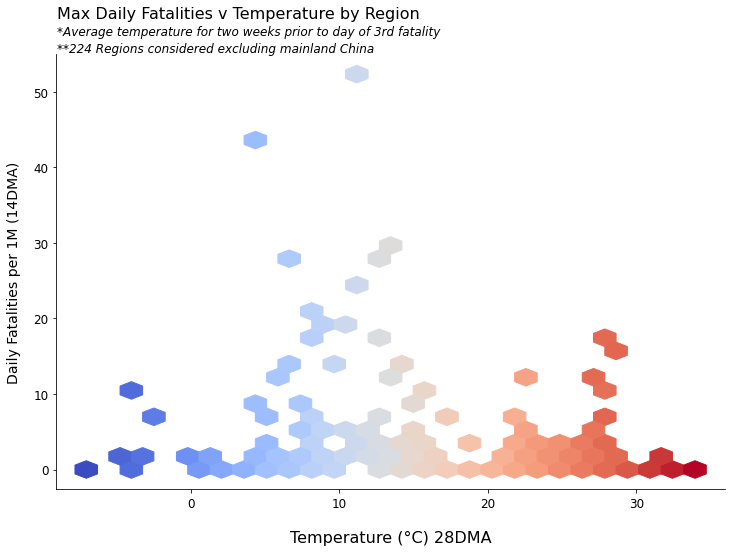

In [4]:
title = 'Max Daily Fatalities v Temperature by Region'
subtitle = '*Average temperature for two weeks prior to day of 3rd fatality'
note = '**{} Regions considered excluding mainland China'.format(casestudy.df.region_id.unique().shape[0])
kwargs = {
    'comp_category': 'deaths_new_dma_per_1M',
    'comp_factor': 'temp_dma',
    'annotations': [
        [-9, 60.3, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
        [-9, 57.9, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
        [-9, 55.7, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 12, 'height': 8,
}
plt = casestudy.heatmap.make(**kwargs)

**Natural Log of Max Fatalities v Temperature**

By taking the natural log of the fatality rate, we can scale the figure to reveal a more *(potentially)* clear relationship.

Viewers often struggle to understand the scaling of a natural log, so an `hlines` option has been provided that will create horizontal lines at the y-values input. `hlines` requires a `list` of `y-values`. 

Text annotations are then included to inform of the unscaled `comp_category` value at each `hline`.

We also provide `comp_factor_start:` as `max`, which puts to use the 28DMA on the day of **peak fatalitiy rate** for each region.

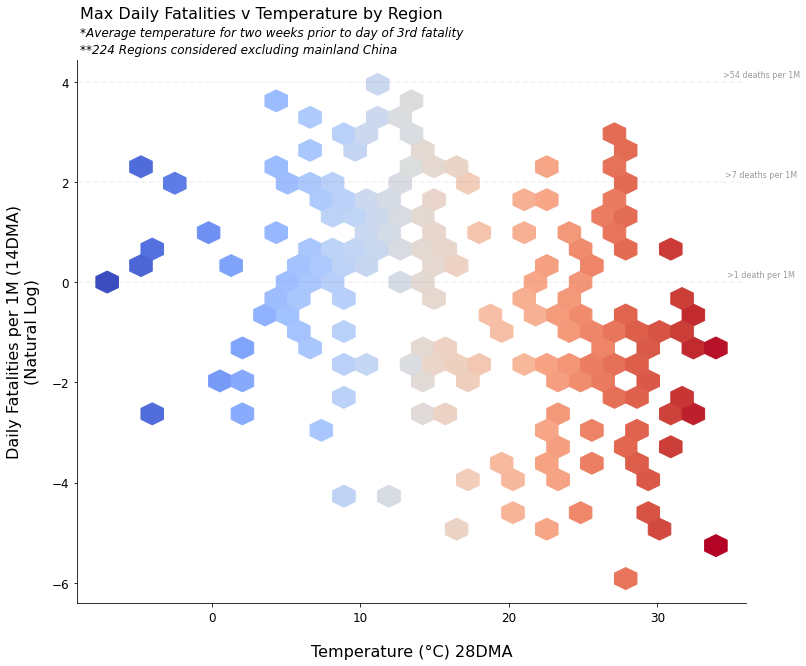

In [5]:
title = 'Max Daily Fatalities v Temperature by Region'
kwargs = {
    'comp_category': 'deaths_new_dma_per_1M_lognat',
    'comp_factor': 'temp_dma',
    'comp_factor_start': 'start_hurdle',
    'annotations': [
        [-8.9, 5.37, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
        [-8.9, 5.0, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
        [-8.9, 4.65, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
        [37, 4.15, '>54 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
        [37, 2.15, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
        [37, 0.15, '>1 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 16, 'fs_clabel': 16,
    'width': 12, 'height': 10,
    'hlines': [0,2,4], 
}
plt = casestudy.heatmap.make(**kwargs)

As with the other chart instances, a chart-specific dataframe can be access for `heatmap` via the `df_hm` attribute.

In [6]:
casestudy.heatmap.df_hm.head(4)

,region_id,region_name,deaths_new_dma_per_1M_lognat,temp_dma
143,456,Aruba,-5.177835,33.949807
88,339,Chad,-1.307941,33.324339
94,377,Costa Rica,-2.699832,33.181135
115,415,Guinea,-2.652459,32.579455


**Lognat of Max Daily New Fatalities and UVB Radition**

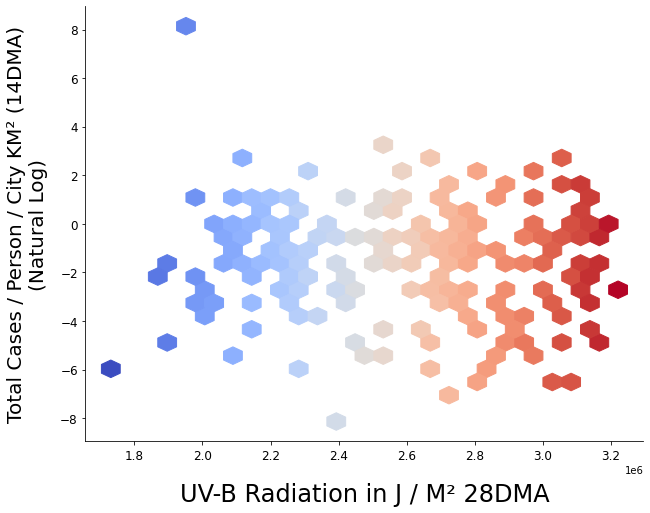

In [7]:
title = 'Max Daily Fatalities v UVB Radiation by Region'
subtitle = '*Color-mapped by average daily uvb radiation for two weeks prior to the day of max fatalities'
kwargs = {
    'comp_category': 'cases_new_dma_per_person_per_city_KM2_lognat',
    'comp_factor': 'uvb_dma',
    'comp_factor_start': 'max',
    'annotations': [
#         [1330000, 9.65,  title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
#         [1330000, 9.15, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [1330000, 8.65, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 24, 'fs_ylabel': 20,
    'width': 10, 'height': 8,
}
plt = casestudy.heatmap.make(**kwargs)

## 6.2 Count Category v Multiple Factors (w one factor color-mapped)

The `heatmap` is made all the more powerful when a second factor is used to map the color space of the chart.

This is done via the `color_factor` parameter, which can be adapted via the `color_factor_start` parameter to take place on the day the `start_hurdle` is cleared or the day of max count category.

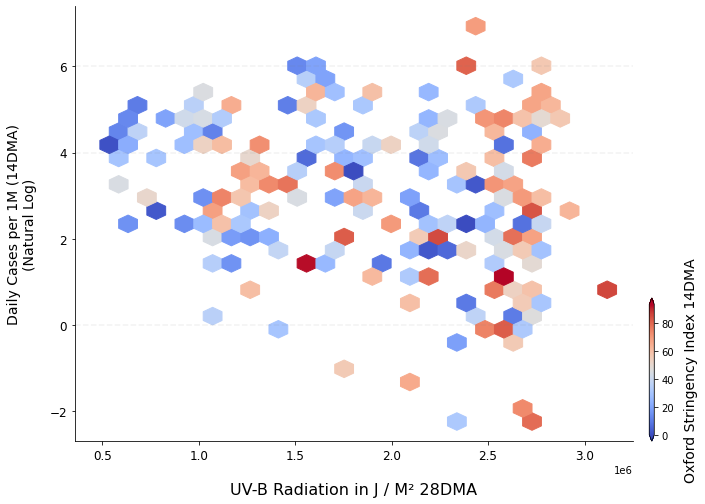

In [8]:
title = 'Max Daily Fatalities v UVB Radiation v Oxford Stringency Index'
subtitle = '*Average UVB radiation and Oxford Stringency Index for two weeks prior to day of 1st fatality'
kwargs = {
    'comp_category': 'cases_new_dma_per_1M_lognat',
    'color_factor': 'strindex_dma',
    'color_factor_start': 'start_hurdle',
    'comp_factor': 'uvb_dma',
    'annotations': [
#         [-10900, 225.6, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
#         [-10900, 217.1, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-10900, 209.2, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-200, 196.4, '>403 cases per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-200, 153.4, '>54 cases per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-10300, 69.5, '>2.7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 10, 'height': 8,
    'hlines': [0, 4, 6],
}
plt = casestudy.heatmap.make(**kwargs)

The `heatmap` approach is even better suited to time-static variables like demographic age ranges, given they are not susceptible to issues around averages over time.

Below we compare `A75PLUBB_%` against the average `strindex` for the 14 days prior to the max fatalitiy rate.

We can see that social distancing stringency was quite common across the spectrum and that population age was a much more important variable impacting fatalities.

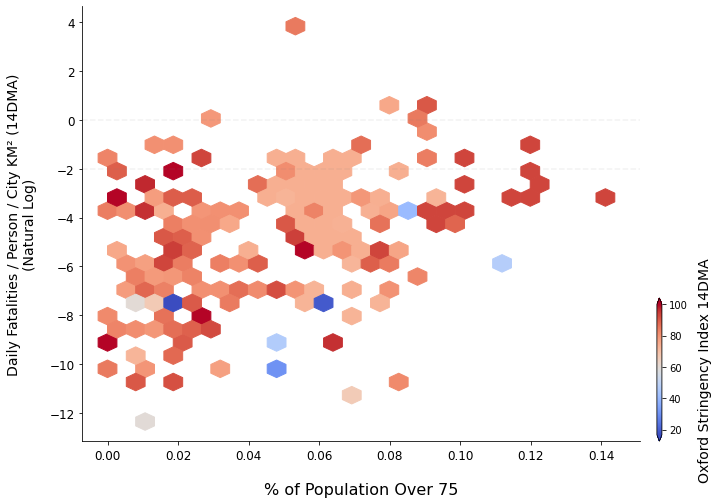

In [9]:
title = 'Max Daily Fatalities v UVB Radiation v Oxford Stringency Index'
subtitle = '*Average UVB radiation and Oxford Stringency Index for two weeks prior to day of 1st fatality'
note = '**Excludes mainland China'

kwargs = {
    'comp_category': 'deaths_new_dma_per_person_per_city_KM2_lognat',
    'comp_factor': 'A75PLUSB_%',
    'color_factor': 'strindex_dma',
    'color_factor_start': 'max',
    'annotations': [
#         [-9690, 213.7, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
#         [-9690, 206.9, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-9690, 200.2, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-200, 155.1, '>1 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-145, 130.9, '>).13 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],

    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 10, 'height': 8,
    'hlines': [0,-2],
}
plt = casestudy.heatmap.make(**kwargs)